In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from io import StringIO

In [6]:
f1 = glob.glob("/Users/advaitiyer/Desktop/*.csv")[0]
f2 = glob.glob("/Users/advaitiyer/Desktop/*.csv")[1]

In [7]:
lturns = pd.read_csv(f1, encoding='utf-8', sep='\t')
weather = pd.read_csv(f2, encoding='utf-8', sep=',')

lturns = lturns.loc[:, ~lturns.columns.str.contains('^Unnamed')]
weather = weather.loc[:, ~weather.columns.str.contains('^Unnamed')]

In [8]:
lturns['date'] = (pd.to_datetime(lturns.pickup_datetime)).dt.date

q_low = lturns["trip_duration"].quantile(0.05)
q_hi  = lturns["trip_duration"].quantile(0.95)

lturns = lturns[(lturns["trip_duration"] < q_hi) & (lturns["trip_duration"] > q_low)]

In [9]:
lturns.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,starting_street,end_street,total_distance,total_travel_time,lturn,date
0,id0000001,2,2016-06-14 10:43:10,2016-06-14 11:01:35,1,-74.013924,40.713924,-73.971649,40.746407,N,1105,West Street,Queens-Midtown Tunnel,13739.9,1034.2,2,2016-06-14
1,id0000003,2,2016-03-16 10:39:55,2016-03-16 10:57:21,5,-73.990753,40.754761,-74.007118,40.741531,N,1046,West 39th Street,Washington Street,2477.6,334.7,3,2016-03-16
2,id0000005,2,2016-04-25 09:50:48,2016-04-25 09:56:56,1,-73.953110,40.798580,-73.968178,40.800270,N,368,Central Park North,Broadway,1804.4,147.9,1,2016-04-25
3,id0000008,1,2016-06-15 09:57:05,2016-06-15 10:02:08,1,-74.009628,40.724762,-74.015869,40.715485,N,303,Holland Tunnel,North End Avenue,1917.9,205.3,2,2016-06-15
4,id0000009,1,2016-05-08 01:43:11,2016-05-08 01:52:18,1,-73.987991,40.759899,-73.959686,40.798504,N,547,West 46th Street,Central Park West,7045.4,457.8,4,2016-05-08


In [10]:
weather.head(5)

,date_time,lat_long,station_id,precip,temp,visibility,windspeed,snow_depth,snow_fall
0,1/1/2016 10:00,4,72502014734,0.0,40.0,10.00,10.0,0.0,0.0
1,1/1/2016 10:00,4,72502594741,0.0,40.0,10.00,8.0,0.0,0.0
2,1/1/2016 10:00,4,72503014732,0.0,40.0,9.97,9.0,0.0,0.0
3,1/1/2016 10:00,4,72505394728,0.0,40.0,10.00,5.0,0.0,0.0
4,1/1/2016 11:00,4,72502014734,0.0,41.0,10.00,16.0,0.0,0.0


In [11]:
def zscore(x):
    ls = []
    mean = x.mean()
    std = x.std(ddof=0)
    for i in range(len(x)):
        y = (x[i] - mean) / std
        ls.append(y)
    out = pd.Series(ls)
    return out   

In [12]:
precip_ser = zscore(weather['precip'])
weather['precip1'] = precip_ser
temp_ser = zscore(weather['temp'])
weather['temp1'] = temp_ser
visibility_ser = zscore(weather['visibility'])
weather['visibility1'] = visibility_ser
windspeed_ser = zscore(weather['windspeed'])
weather['windspeed1'] = windspeed_ser
snow_depth_ser = zscore(weather['snow_depth'])
weather['snow_depth1'] = snow_depth_ser
snow_fall_ser = zscore(weather['snow_fall'])
weather['snow_fall1'] = snow_fall_ser

In [13]:
weather.head(10)

,date_time,lat_long,station_id,precip,temp,visibility,windspeed,snow_depth,snow_fall,precip1,temp1,visibility1,windspeed1,snow_depth1,snow_fall1
0,1/1/2016 10:00,4,72502014734,0.0,40.0,10.00,10.0,0.0,0.0,-0.062148,-0.671872,0.370022,0.286875,-0.177053,-0.0831
1,1/1/2016 10:00,4,72502594741,0.0,40.0,10.00,8.0,0.0,0.0,-0.062148,-0.671872,0.370022,-0.062588,-0.177053,-0.0831
2,1/1/2016 10:00,4,72503014732,0.0,40.0,9.97,9.0,0.0,0.0,-0.062148,-0.671872,0.355563,0.112143,-0.177053,-0.0831
3,1/1/2016 10:00,4,72505394728,0.0,40.0,10.00,5.0,0.0,0.0,-0.062148,-0.671872,0.370022,-0.586784,-0.177053,-0.0831
4,1/1/2016 11:00,4,72502014734,0.0,41.0,10.00,16.0,0.0,0.0,-0.062148,-0.612362,0.370022,1.335265,-0.177053,-0.0831
5,1/1/2016 11:00,4,72502594741,0.0,41.0,10.00,7.0,0.0,0.0,-0.062148,-0.612362,0.370022,-0.237320,-0.177053,-0.0831
6,1/1/2016 11:00,4,72503014732,0.0,41.0,10.00,11.0,0.0,0.0,-0.062148,-0.612362,0.370022,0.461607,-0.177053,-0.0831
7,1/1/2016 11:00,4,72505394728,0.0,40.0,10.00,6.0,0.0,0.0,-0.062148,-0.671872,0.370022,-0.412052,-0.177053,-0.0831
8,1/1/2016 12:00,4,72502014734,0.0,41.0,10.00,14.0,0.0,0.0,-0.062148,-0.612362,0.370022,0.985802,-0.177053,-0.0831
9,1/1/2016 12:00,4,72502594741,0.0,41.0,10.00,9.0,0.0,0.0,-0.062148,-0.612362,0.370022,0.112143,-0.177053,-0.0831


In [14]:
weather['sum'] = weather['precip1']+weather['temp1']+weather['visibility1']+weather['windspeed1']+weather['snow_depth1']+weather['snow_fall1']

In [15]:
to_inter = weather.loc[weather['sum']>21]

In [16]:
weather.loc[weather['sum']<(-21)]

,date_time,lat_long,station_id,precip,temp,visibility,windspeed,snow_depth,snow_fall,precip1,temp1,visibility1,windspeed1,snow_depth1,snow_fall1,sum


In [17]:
weather_new = weather.loc[weather['sum']<21]

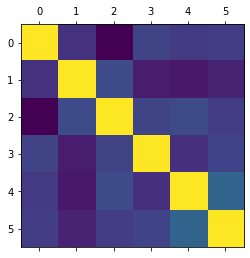

In [18]:
plt.matshow(weather_new[['precip','temp','visibility','windspeed','snow_depth','snow_fall']].corr())
plt.show()

In [19]:
weather_new[['precip','temp','visibility','windspeed','snow_depth','snow_fall']].corr()

,precip,temp,visibility,windspeed,snow_depth,snow_fall
precip,1.000000,-0.049525,-0.227270,0.023387,-0.017464,-0.004799
temp,-0.049525,1.000000,0.054972,-0.135104,-0.145645,-0.105481
visibility,-0.227270,0.054972,1.000000,0.025114,0.052840,-0.004613
windspeed,0.023387,-0.135104,0.025114,1.000000,-0.054690,0.021179
snow_depth,-0.017464,-0.145645,0.052840,-0.054690,1.000000,0.165441
snow_fall,-0.004799,-0.105481,-0.004613,0.021179,0.165441,1.000000


In [20]:
weather_new[['precip1','temp1','visibility1','windspeed1','snow_depth1','snow_fall1']].corr()

,precip1,temp1,visibility1,windspeed1,snow_depth1,snow_fall1
precip1,1.000000,-0.049525,-0.227270,0.023387,-0.017464,-0.004799
temp1,-0.049525,1.000000,0.054972,-0.135104,-0.145645,-0.105481
visibility1,-0.227270,0.054972,1.000000,0.025114,0.052840,-0.004613
windspeed1,0.023387,-0.135104,0.025114,1.000000,-0.054690,0.021179
snow_depth1,-0.017464,-0.145645,0.052840,-0.054690,1.000000,0.165441
snow_fall1,-0.004799,-0.105481,-0.004613,0.021179,0.165441,1.000000


In [21]:
weather['date_time'] = pd.to_datetime(weather['date_time'])
time_gp = weather.groupby('date_time')

In [23]:
weather_new['date_time'] = pd.to_datetime(weather_new['date_time'])
weather_new['date'] = weather_new['date_time'].dt.date
date_gp = weather_new.groupby('date')
assign_temp=[]
# inter =0
# no_inter= 0
out=[]
out2 = []
for name, group in date_gp:
    time_gp = group.groupby('date_time')
    for col, stations in time_gp:
#         print(col)
        sm=[]
        sm1=[]
        temp=[]
        temp1=[]
        precip =[]
        precip1 = []
        visib=[]
        visib1 = []
        wind =[]
        wind1=[]
        snow_d=[]
        snow_d1=[]
        snow_f=[]
        snow_f1=[]
        stationid =[]
        stationid1=[]
        stamp1=[]
        for i in stations["sum"]:
            sm.append(i)
        if (max(sm)-min(sm)<(12)):
            for i in stations["temp"]:
                temp.append(i)
            for i in stations["precip"]:
                precip.append(i)
            for i in stations["visibility"]:
                visib.append(i)
            for i in stations["windspeed"]:
                wind.append(i)
            for i in stations["snow_depth"]:
                snow_d.append(i)
            for i in stations["snow_fall"]:
                snow_f.append(i)  
            precip_in= statistics.mean(precip)
            temp_in= statistics.mean(temp)
            wind_in= statistics.mean(wind)
            visib_in= statistics.mean(visib)
            snowf_in= statistics.mean(snow_f)
            snowd_in= statistics.mean(snow_d)
            stamp = col
            value = [stamp, precip_in, temp_in, visib_in, wind_in, snowd_in, snowf_in]
            out.append(value)
        else:
            for i in stations['date_time']:
                stamp1.append(i)
            for i in stations["temp"]:
                temp1.append(i)
            for i in stations["precip"]:
                precip1.append(i)
            for i in stations["visibility"]:
                visib1.append(i)
            for i in stations["windspeed"]:
                wind1.append(i)
            for i in stations["snow_depth"]:
                snow_d1.append(i)
            for i in stations["snow_fall"]:
                snow_f1.append(i)
            for i in stations['station_id']:
                stationid1.append(i)
            value2 = [stamp1,stationid1, precip1, temp1, visib1, wind1, snow_d1, snow_f1]
            val2 = list(map(list,zip(*value2)))
            for i in val2:
                out2.append(i)
        
df = pd.DataFrame(out, columns=['timestamp','precip','temp','visibility','wind','snow_depth','snow_fall'])
df_inter = pd.DataFrame(out2, columns=['timestamp','station','precip','temp','visibility','wind','snow_depth','snow_fall'])



/Users/advaitiyer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/advaitiyer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df.head(10)

,timestamp,precip,temp,visibility,wind,snow_depth,snow_fall
0,2016-01-01 01:00:00,0.0,42.25,9.9850,9.75,0.0,0.0
1,2016-01-01 02:00:00,0.0,41.75,10.0000,9.00,0.0,0.0
2,2016-01-01 03:00:00,0.0,41.25,10.0000,8.75,0.0,0.0
3,2016-01-01 04:00:00,0.0,41.25,9.9925,10.75,0.0,0.0
4,2016-01-01 05:00:00,0.0,40.25,10.0000,11.75,0.0,0.0
5,2016-01-01 06:00:00,0.0,40.25,10.0000,10.25,0.0,0.0
6,2016-01-01 07:00:00,0.0,39.50,9.9850,7.75,0.0,0.0
7,2016-01-01 08:00:00,0.0,39.50,10.0000,8.25,0.0,0.0
8,2016-01-01 09:00:00,0.0,39.50,10.0000,8.25,0.0,0.0
9,2016-01-01 10:00:00,0.0,40.00,9.9925,8.00,0.0,0.0


In [25]:
df_inter.head(10)

,timestamp,station,precip,temp,visibility,wind,snow_depth,snow_fall
0,2016-01-24 00:00:00,72502014734,0.01,25.500000,1.750000,17.750000,7.0,24.0
1,2016-01-24 00:00:00,72502594741,0.00,27.000000,4.333333,11.333333,0.0,0.0
2,2016-01-24 00:00:00,72503014732,0.00,28.000000,7.000000,20.000000,7.0,27.9
3,2016-01-24 00:00:00,72505394728,0.00,27.000000,4.000000,5.000000,6.0,27.3
4,2016-01-24 01:00:00,72502014734,0.01,26.666667,3.663333,18.000000,7.0,24.0
5,2016-01-24 01:00:00,72502594741,0.00,28.500000,7.500000,13.000000,0.0,0.0
6,2016-01-24 01:00:00,72503014732,0.00,27.666667,3.910000,23.666667,7.0,27.9
7,2016-01-24 01:00:00,72505394728,0.00,26.400000,3.600000,10.000000,6.0,27.3
8,2016-01-24 02:00:00,72502014734,0.00,28.000000,9.000000,20.000000,7.0,24.0
9,2016-01-24 02:00:00,72502594741,0.00,28.000000,7.000000,14.000000,0.0,0.0


In [26]:
lturns['drop_time'] = pd.to_datetime(lturns['dropoff_datetime'])

In [27]:
lturns['drop_round'] = lturns['drop_time'].dt.round('H')

In [25]:
lturns.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,starting_street,end_street,total_distance,total_travel_time,lturn,date,drop_time,drop_round
0,id0000001,2,2016-06-14 10:43:10,2016-06-14 11:01:35,1,-74.013924,40.713924,-73.971649,40.746407,N,1105,West Street,Queens-Midtown Tunnel,13739.9,1034.2,2,2016-06-14,2016-06-14 11:01:35,2016-06-14 11:00:00
1,id0000003,2,2016-03-16 10:39:55,2016-03-16 10:57:21,5,-73.990753,40.754761,-74.007118,40.741531,N,1046,West 39th Street,Washington Street,2477.6,334.7,3,2016-03-16,2016-03-16 10:57:21,2016-03-16 11:00:00
2,id0000005,2,2016-04-25 09:50:48,2016-04-25 09:56:56,1,-73.953110,40.798580,-73.968178,40.800270,N,368,Central Park North,Broadway,1804.4,147.9,1,2016-04-25,2016-04-25 09:56:56,2016-04-25 10:00:00
3,id0000008,1,2016-06-15 09:57:05,2016-06-15 10:02:08,1,-74.009628,40.724762,-74.015869,40.715485,N,303,Holland Tunnel,North End Avenue,1917.9,205.3,2,2016-06-15,2016-06-15 10:02:08,2016-06-15 10:00:00
4,id0000009,1,2016-05-08 01:43:11,2016-05-08 01:52:18,1,-73.987991,40.759899,-73.959686,40.798504,N,547,West 46th Street,Central Park West,7045.4,457.8,4,2016-05-08,2016-05-08 01:52:18,2016-05-08 02:00:00
5,id0000011,2,2016-03-04 22:20:52,2016-03-04 22:25:08,1,-73.969185,40.765926,-73.981659,40.762234,N,256,East 63rd Street,West 52nd Street,1721.7,178.4,3,2016-03-04,2016-03-04 22:25:08,2016-03-04 22:00:00
6,id0000013,1,2016-02-19 13:58:59,2016-02-19 14:06:06,1,-73.973442,40.763786,-73.978828,40.751858,N,427,5th Avenue,East 41st Street,1630.4,168.4,1,2016-02-19,2016-02-19 14:06:06,2016-02-19 14:00:00
7,id0000015,1,2016-05-17 09:06:59,2016-05-17 09:39:18,1,-73.983696,40.780949,-73.954376,40.764175,N,1939,West End Ave.,NewYork Hospital Drive,4119.7,366.1,2,2016-05-17,2016-05-17 09:39:18,2016-05-17 10:00:00
8,id0000016,1,2016-03-29 16:36:36,2016-03-29 16:42:54,1,-73.960320,40.770321,-73.946220,40.772736,N,378,3rd Avenue,East End Avenue,1700.8,165.1,2,2016-03-29,2016-03-29 16:42:54,2016-03-29 17:00:00
9,id0000020,2,2016-03-13 03:48:46,2016-03-13 03:53:43,3,-74.004204,40.742226,-73.994507,40.751823,N,297,West 16th Street,West 33rd Street,1639.9,224.3,2,2016-03-13,2016-03-13 03:53:43,2016-03-13 04:00:00


In [28]:
join_df= lturns.merge(df,how='left',left_on=['drop_round'],right_on=['timestamp'])
join_df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date,drop_time,drop_round,timestamp,precip,temp,visibility,wind,snow_depth,snow_fall
0,id0000001,2,2016-06-14 10:43:10,2016-06-14 11:01:35,1,-74.013924,40.713924,-73.971649,40.746407,N,...,2016-06-14,2016-06-14 11:01:35,2016-06-14 11:00:00,2016-06-14 11:00:00,0.0,72.00,10.0000,9.500000,0.0,0.00
1,id0000003,2,2016-03-16 10:39:55,2016-03-16 10:57:21,5,-73.990753,40.754761,-74.007118,40.741531,N,...,2016-03-16,2016-03-16 10:57:21,2016-03-16 11:00:00,2016-03-16 11:00:00,0.0,59.50,10.0000,2.750000,0.0,0.00
2,id0000005,2,2016-04-25 09:50:48,2016-04-25 09:56:56,1,-73.953110,40.798580,-73.968178,40.800270,N,...,2016-04-25,2016-04-25 09:56:56,2016-04-25 10:00:00,2016-04-25 10:00:00,0.0,61.00,9.9925,6.750000,0.0,0.00
3,id0000008,1,2016-06-15 09:57:05,2016-06-15 10:02:08,1,-74.009628,40.724762,-74.015869,40.715485,N,...,2016-06-15,2016-06-15 10:02:08,2016-06-15 10:00:00,2016-06-15 10:00:00,0.0,78.25,9.9925,3.500000,0.0,0.00
4,id0000009,1,2016-05-08 01:43:11,2016-05-08 01:52:18,1,-73.987991,40.759899,-73.959686,40.798504,N,...,2016-05-08,2016-05-08 01:52:18,2016-05-08 02:00:00,2016-05-08 02:00:00,0.0,48.75,6.8750,3.166667,0.0,0.00
5,id0000011,2,2016-03-04 22:20:52,2016-03-04 22:25:08,1,-73.969185,40.765926,-73.981659,40.762234,N,...,2016-03-04,2016-03-04 22:25:08,2016-03-04 22:00:00,2016-03-04 22:00:00,0.0,34.75,9.9925,11.750000,0.0,0.25
6,id0000013,1,2016-02-19 13:58:59,2016-02-19 14:06:06,1,-73.973442,40.763786,-73.978828,40.751858,N,...,2016-02-19,2016-02-19 14:06:06,2016-02-19 14:00:00,2016-02-19 14:00:00,0.0,35.50,10.0000,8.250000,0.0,0.00
7,id0000015,1,2016-05-17 09:06:59,2016-05-17 09:39:18,1,-73.983696,40.780949,-73.954376,40.764175,N,...,2016-05-17,2016-05-17 09:39:18,2016-05-17 10:00:00,2016-05-17 10:00:00,0.0,63.75,7.4925,4.750000,0.0,0.00
8,id0000016,1,2016-03-29 16:36:36,2016-03-29 16:42:54,1,-73.960320,40.770321,-73.946220,40.772736,N,...,2016-03-29,2016-03-29 16:42:54,2016-03-29 17:00:00,2016-03-29 17:00:00,0.0,50.75,10.0000,20.250000,0.0,0.00
9,id0000020,2,2016-03-13 03:48:46,2016-03-13 03:53:43,3,-74.004204,40.742226,-73.994507,40.751823,N,...,2016-03-13,2016-03-13 03:53:43,2016-03-13 04:00:00,2016-03-13 04:00:00,0.0,50.00,9.9925,3.250000,0.0,0.00


In [28]:
precip_ser = zscore(join_df['precip'])
join_df['precip'] = precip_ser
temp_ser = zscore(join_df['temp'])
join_df['temp'] = temp_ser
visibility_ser = zscore(join_df['visibility'])
join_df['visibility'] = visibility_ser
windspeed_ser = zscore(join_df['wind'])
join_df['wind'] = windspeed_ser
snow_depth_ser = zscore(join_df['snow_depth'])
join_df['snow_depth'] = snow_depth_ser
snow_fall_ser = zscore(join_df['snow_fall'])
join_df['snow_fall'] = snow_fall_ser

In [29]:
join_df.to_csv('joined_data.csv', sep='\t')